In [1]:
# Imports
from utils.analysis.tools import simDir
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import pandas as pd
import seaborn as sns

In [2]:
root = (Path("/nfs/arupclab001/davidgoh/")
    / "CoupledEPCondensates/workspace/"
    / "01_Flow/20231120_FlowPhaseDiagramHighRes")

In [3]:
sweep_directory = Path(root)
sweep_file = sweep_directory / "sweep_parameters.txt"
sweep_parameters = [line.split(",")[0] for line in sweep_file.read_text().splitlines()]

In [4]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]

In [5]:
col = sweep_parameters + ["n_condensate", "max_eccentricity", "max_variance", "mean"]

In [20]:
def worker(worker_input):
    simdir_path = worker_input
    sd = simDir(simdir_path)
    val = []
    sd.run()
    sd.condensate()
    val.append(sd.params['k_production'])
    val.append(sd.params['initial_values'][0])
    
    try:
        val.append(sd.n_condensate().max())
    except:
        val.append(0)

    if val[2] == 1:
        val.append(sd.eccentricity.max())
        val.append(np.var(sd.radius,axis=1).max())
        val.append(np.mean(sd.radius))
    else:
        val += [np.nan, np.nan, np.nan]
    
    return val

In [21]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]
processes = mp.Pool(8-1)
results = processes.map(worker,simdir_paths)

Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.






Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using de

In [38]:
df = pd.DataFrame(results)
df.columns = col
pivot = df.pivot_table(index="initial_values",columns="k_production",values=["max_eccentricity","max_variance","mean", "n_condensate"])

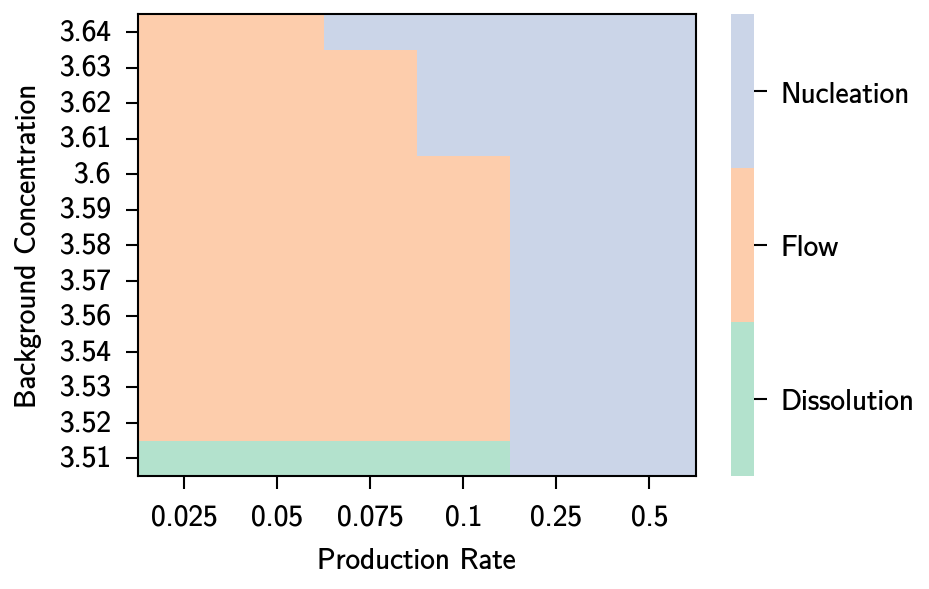

In [46]:
variable = "n_condensate"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': ""},
                cmap=sns.color_palette(sns.color_palette("Pastel2")[:3]),
                vmin=0,vmax=2)
colorbar = ax.collections[0].colorbar 

ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

n = 3
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(["Dissolution", "Flow", "Nucleation"])       

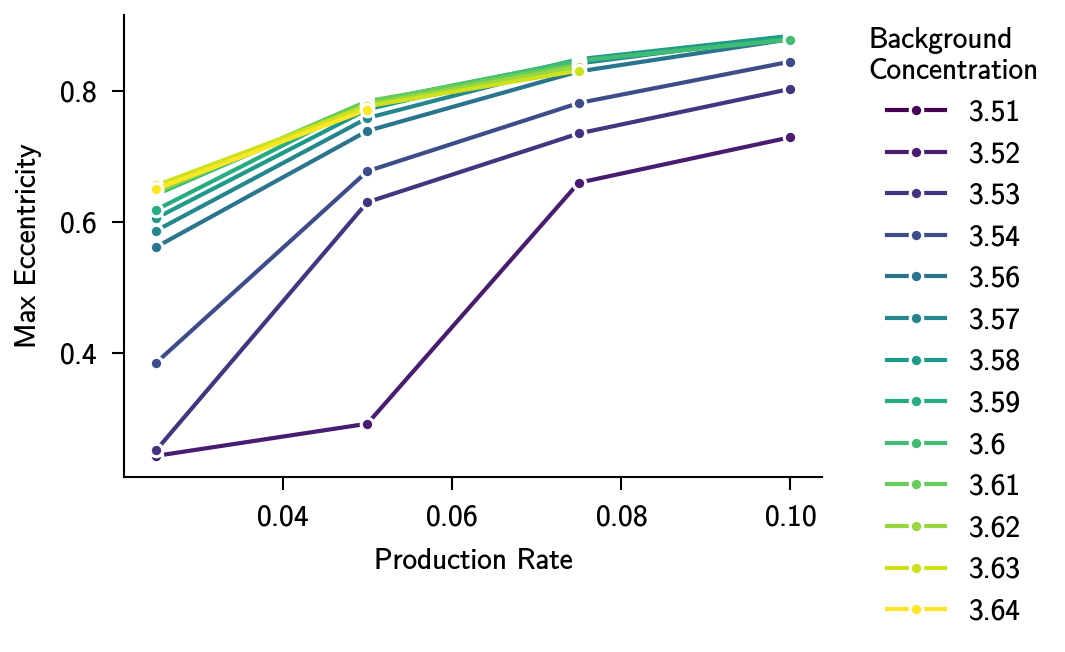

In [47]:
variable = "max_eccentricity"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Max Eccentricity")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

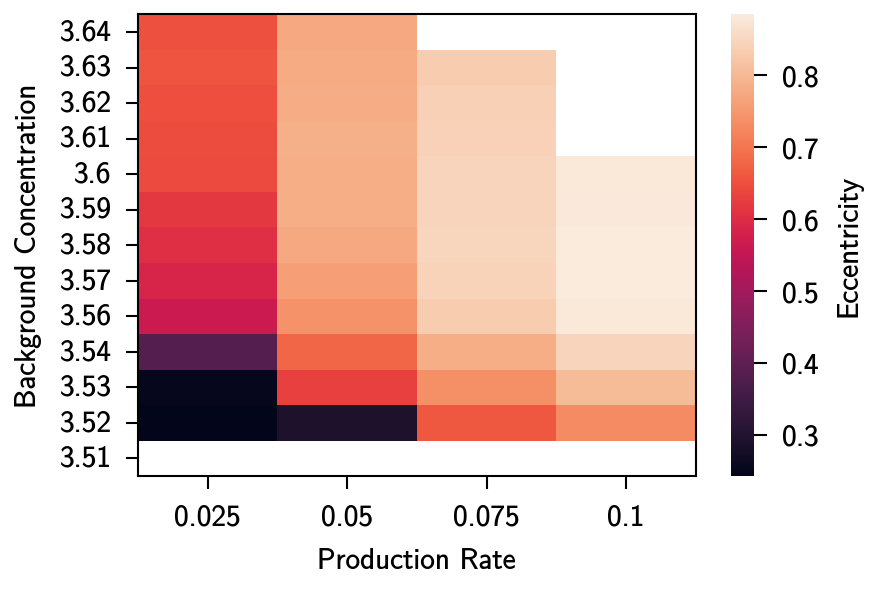

In [48]:
variable = "max_eccentricity"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "max_eccentricity"})
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

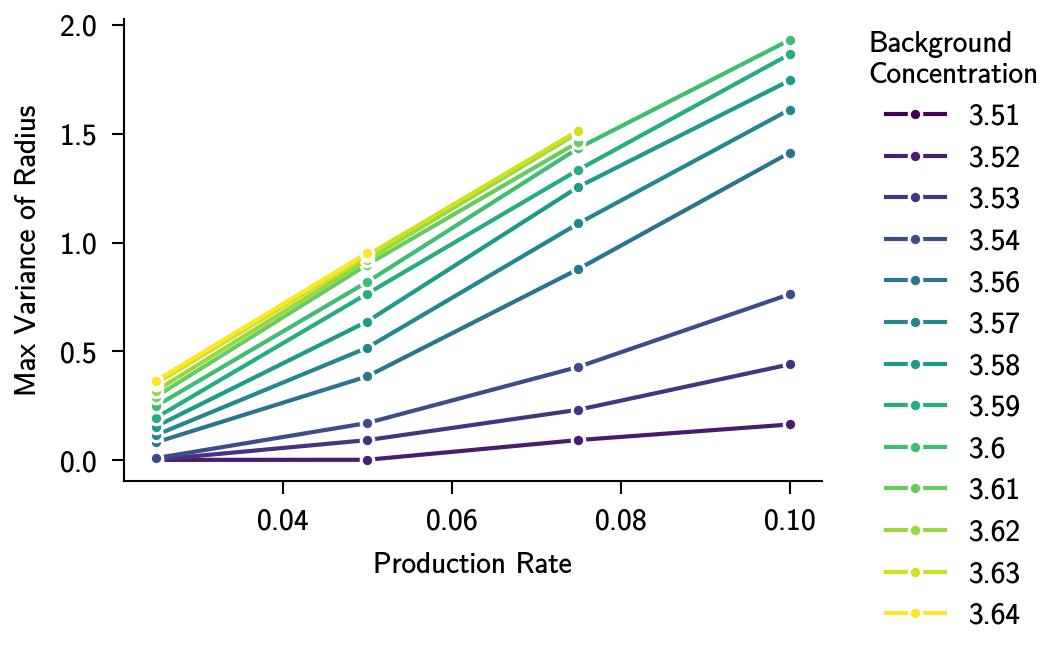

In [49]:
variable = "max_variance"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Max Variance of Radius")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

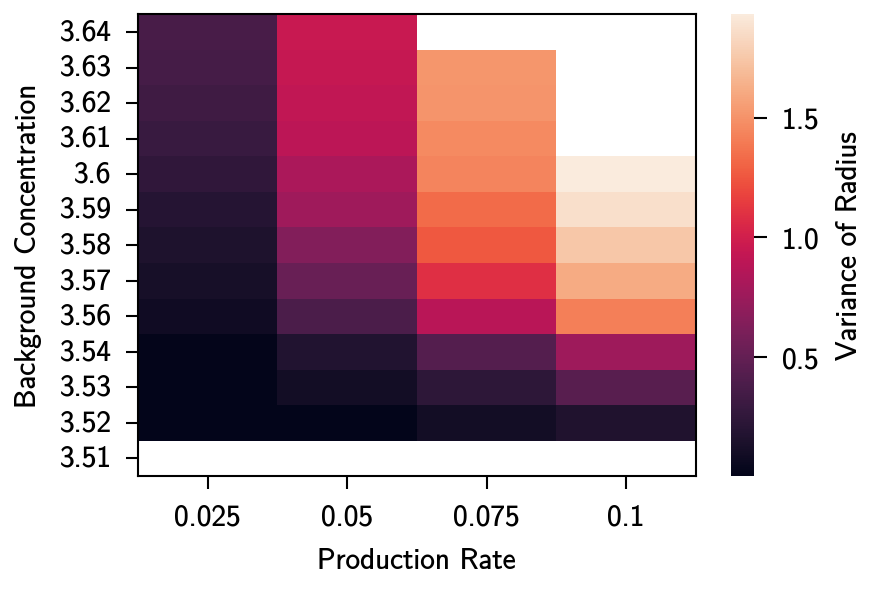

In [50]:
variable = "max_variance"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "Variance of Radius"})
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

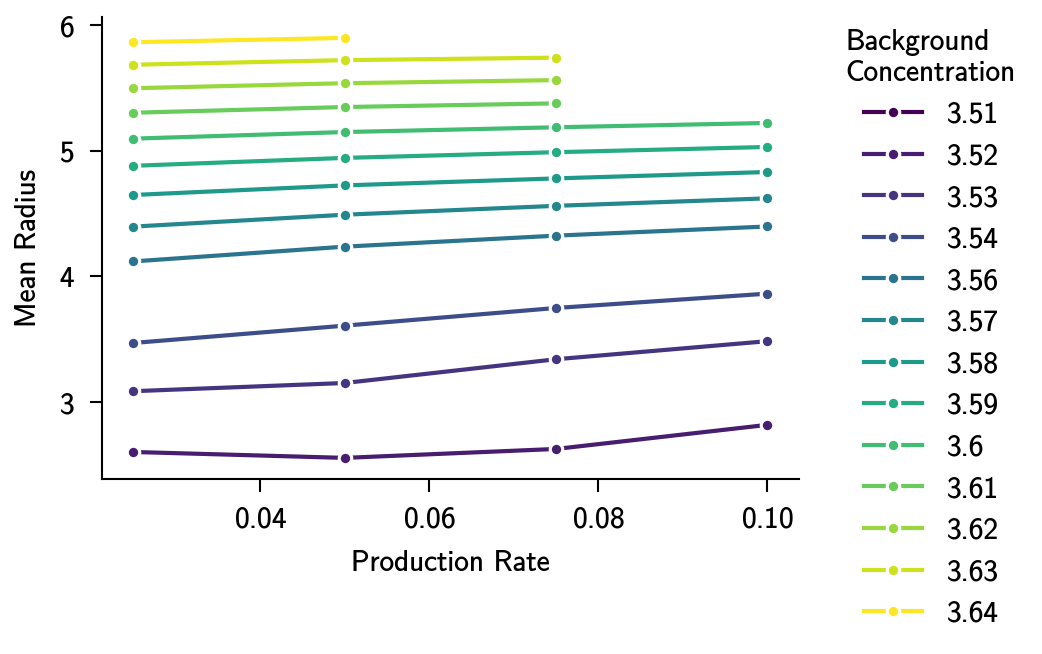

In [51]:
variable = "mean"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Mean Radius")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

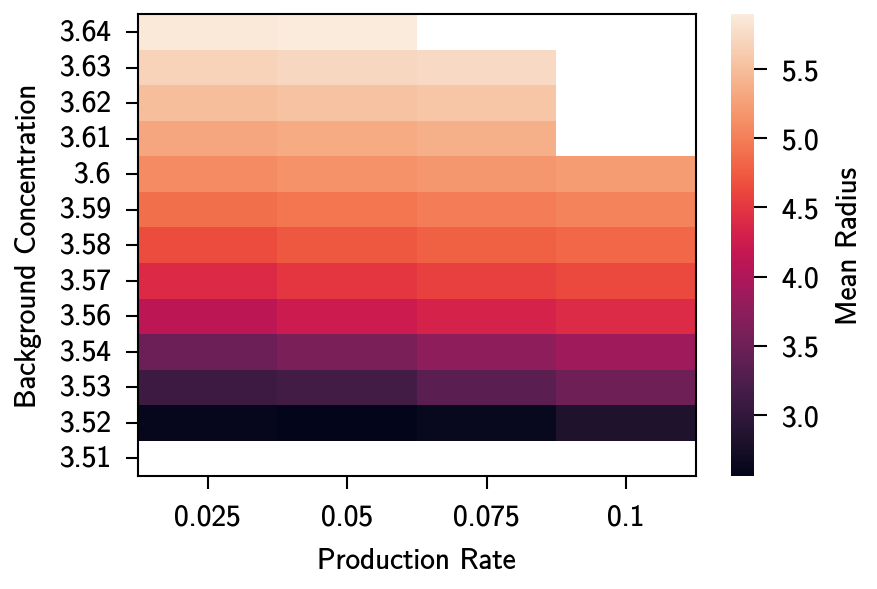

In [52]:
variable = "mean"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "Mean Radius"},
                cmap="rocket")
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)